<a href="https://colab.research.google.com/github/Huong2k1/AI_homework/blob/main/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from matplotlib.image import imread
from keras.preprocessing import  image
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
face = ['Huong','Lan','Tai']
dir_train = '/content/gdrive/MyDrive/data_face/Train' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in face:
    path = os.path.join(dir,i)
    index_label = face.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) 

In [ ]:
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 3)
print(x_train.shape) 
print(y_train.shape)

(84, 150, 150, 3)
(84, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(27,48),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(150,150,3),
                 strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(3, activation='softmax', name='layer4'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 30, verbose=1,batch_size=20)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 4, 2, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 2, 128)         10616960  
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 1, 128)       

Value predict : 0
Huong


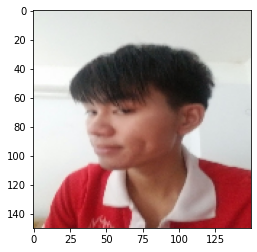

In [ ]:
filename = '/content/gdrive/MyDrive/data_face/Test/Huong/20.jpg'  
face = image.load_img(filename, target_size=(150,150))
plt.imshow(face)
face = img_to_array(face)
face = face.reshape(1,150,150,3) 
face = face.astype('float32')
face = face/255
np.argmax(model.predict(face), axis=1)
print('Value predict :', np.argmax(model.predict(face)))
if np.argmax(model.predict(face)) == 0:
   print("Huong")
if np.argmax(model.predict(face)) == 1:
   print("Lan")
if np.argmax(model.predict(face)) == 2:
   print("Tai")

Value predict : 1
Lan


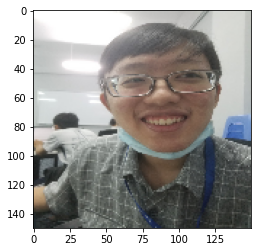

In [ ]:
filename = '/content/gdrive/MyDrive/data_face/Test/Lan/28.jpg'  
face = image.load_img(filename, target_size=(150,150))
plt.imshow(face)
face = img_to_array(face)
face = face.reshape(1,150,150,3) 
face = face.astype('float32')
face = face/255
np.argmax(model.predict(face), axis=1)
print('Value predict :', np.argmax(model.predict(face)))
if np.argmax(model.predict(face)) == 0:
   print("Huong")
if np.argmax(model.predict(face)) == 1:
   print("Lan")
if np.argmax(model.predict(face)) == 2:
   print("Tai")

Value predict : 2
Tai


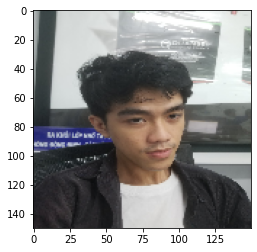

In [ ]:
filename = '/content/gdrive/MyDrive/data_face/Test/Tai/20.jpg'  
face = image.load_img(filename, target_size=(150,150))
plt.imshow(face)
face = img_to_array(face)
face = face.reshape(1,150,150,3) 
face = face.astype('float32')
face = face/255
np.argmax(model.predict(face), axis=1)
print('Value predict :', np.argmax(model.predict(face)))
if np.argmax(model.predict(face)) == 0:
   print("Huong")
if np.argmax(model.predict(face)) == 1:
   print("Lan")
if np.argmax(model.predict(face)) == 2:
   print("Tai")